In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


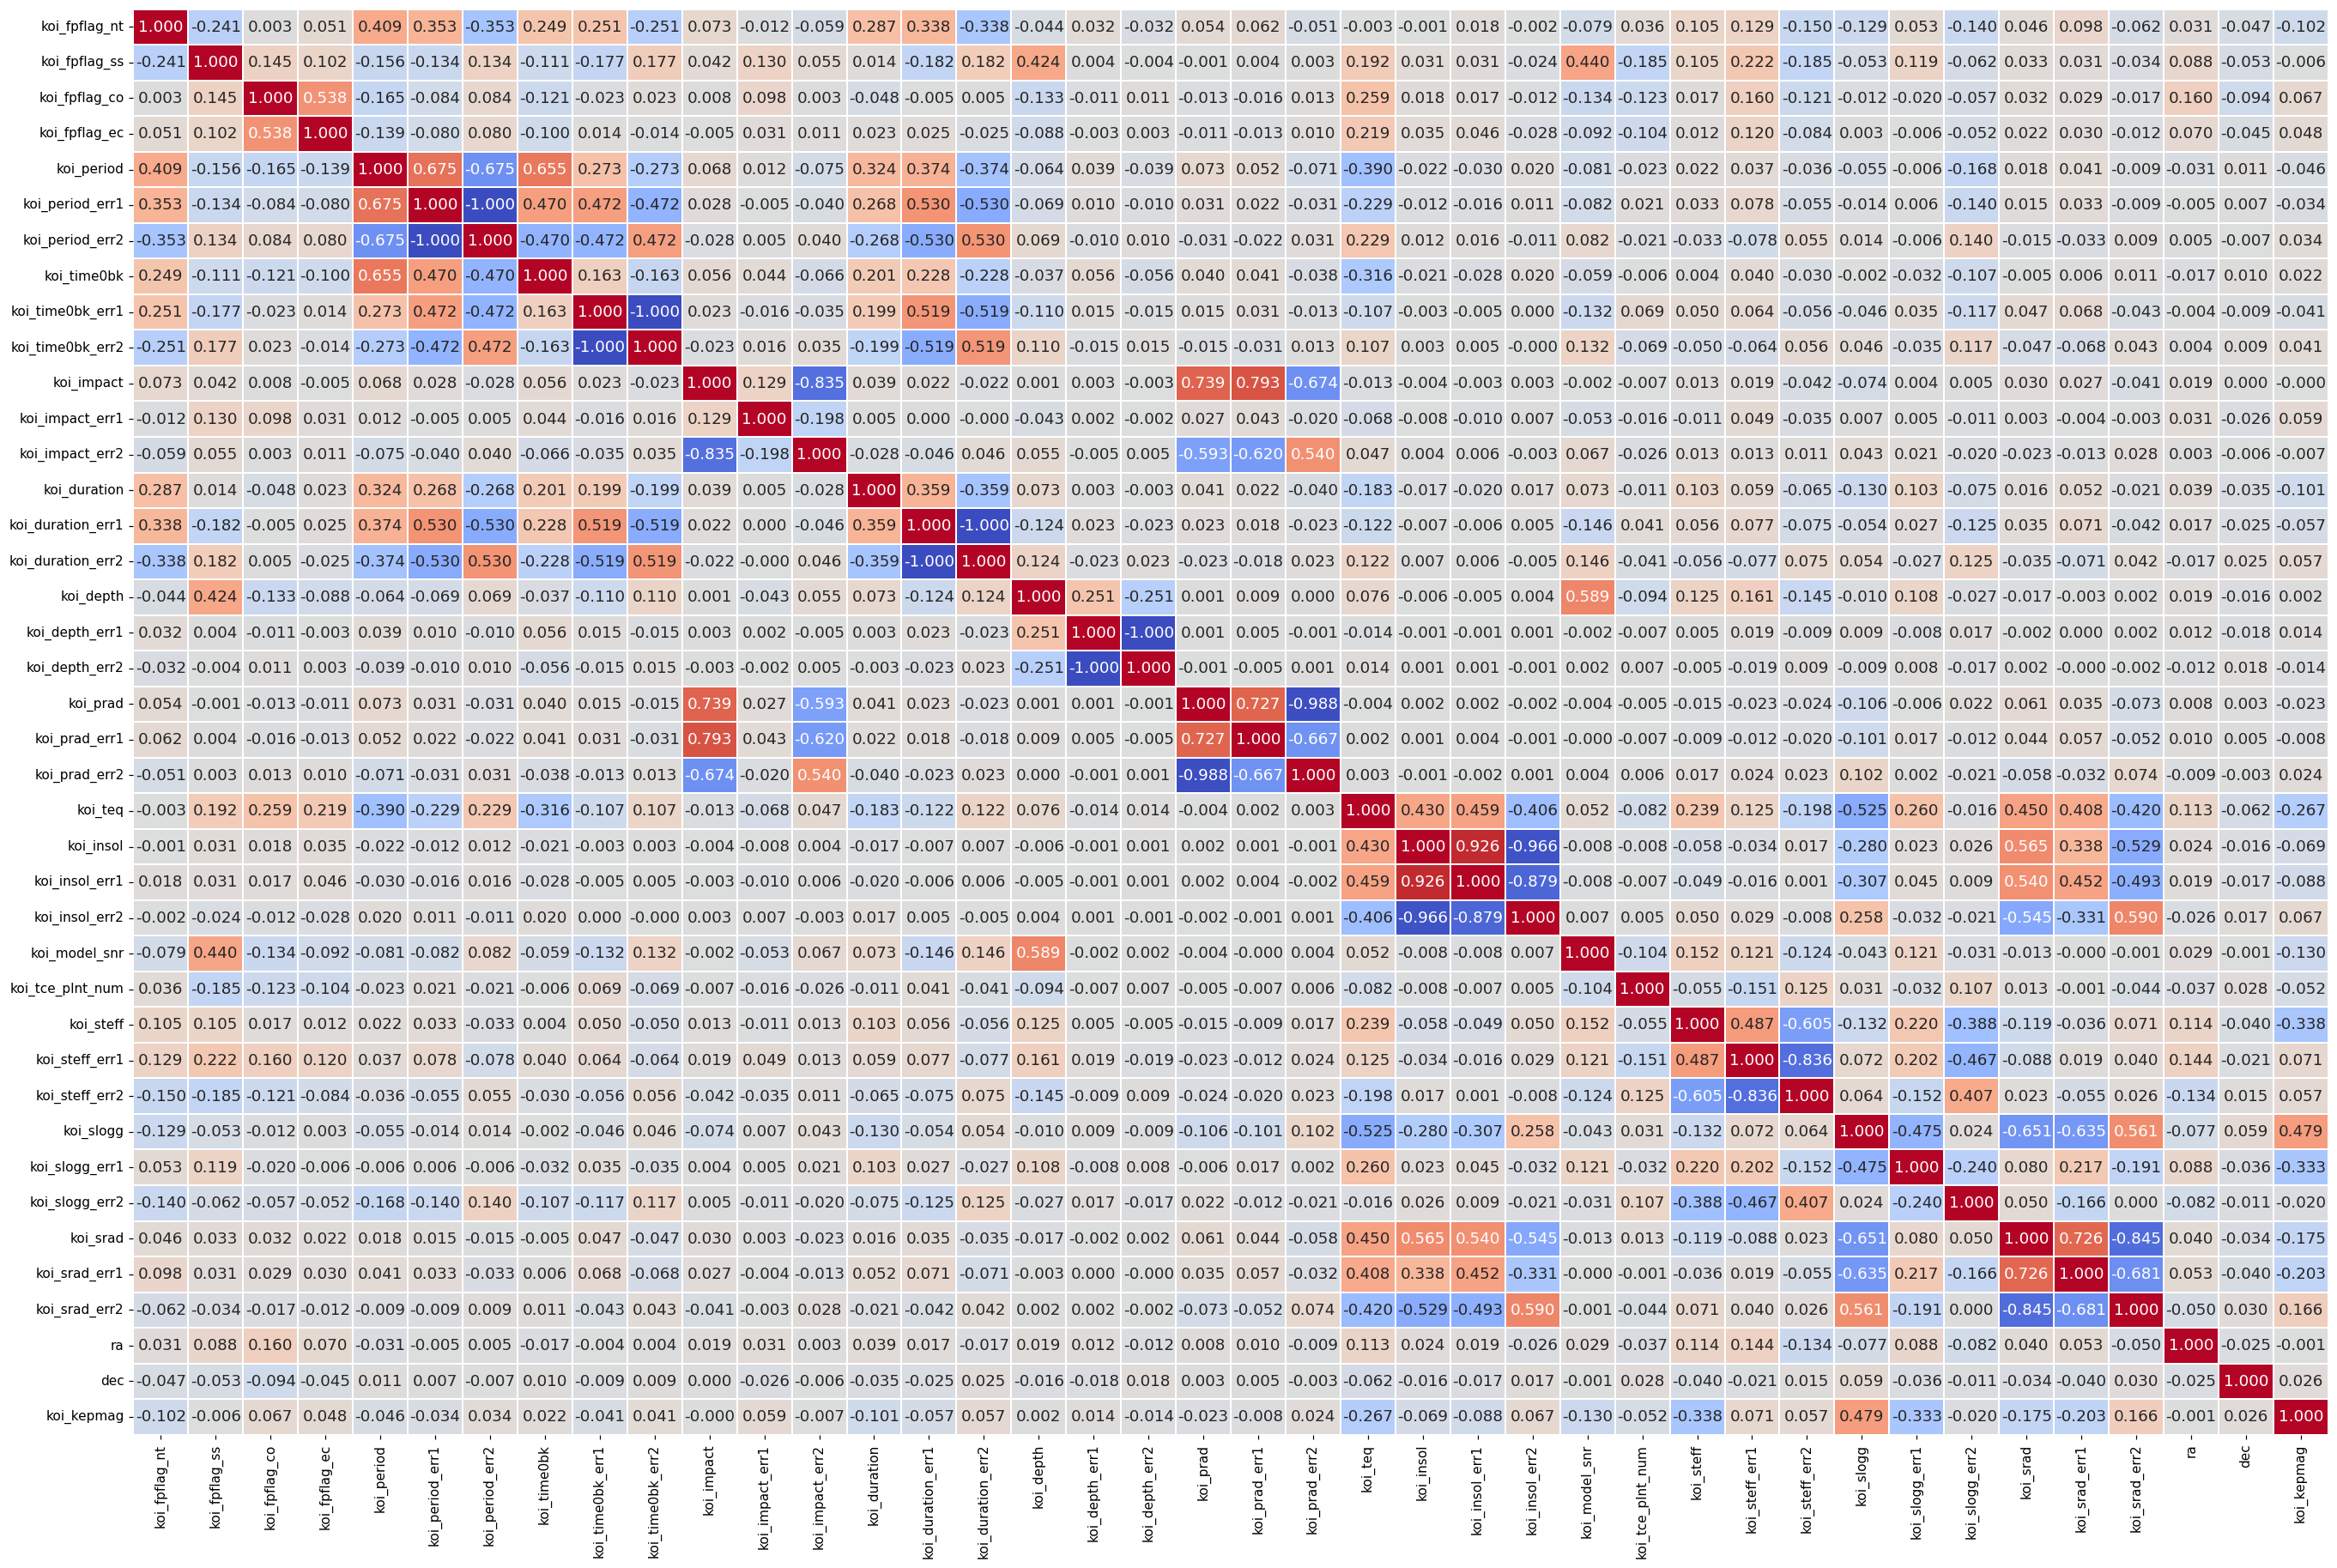

In [10]:
corr_map = df.corr()

plt.figure(figsize=(30, 20), dpi=110) 
_ = sns.heatmap(corr_map, annot=True, annot_kws={"fontsize":12}, linecolor='white', \
            linewidth=1, fmt='.3f', cmap="coolwarm", cbar=False)

# 3. Select your features (columns)

In [11]:
# Set features. This will also be used as your x values.
selected_features = df.drop("koi_disposition", axis=1)

# 4. Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
y = df["koi_disposition"]
print(selected_features.shape, y.shape)

(6991, 40) (6991,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42, stratify = y)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6080,1,0,0,0,12.496435,2.213000e-04,-2.213000e-04,132.035800,0.014300,-0.014300,...,-286,3.805,0.390,-0.130,2.730,0.535,-1.248,289.23080,44.412483,13.054
3001,0,0,0,0,11.615625,1.528000e-04,-1.528000e-04,131.968430,0.008230,-0.008230,...,-72,4.083,0.368,-0.092,1.453,0.218,-0.510,293.52756,41.111439,15.162
570,0,1,0,0,10.980246,6.930000e-07,-6.930000e-07,137.137607,0.000053,-0.000053,...,-159,4.462,0.098,-0.182,0.897,0.238,-0.119,282.79764,43.578129,14.212
4897,1,0,0,0,466.908240,1.194000e-02,-1.194000e-02,136.373100,0.019000,-0.019000,...,-146,4.456,0.102,-0.361,0.867,0.448,-0.103,297.65436,43.178551,15.202
625,0,1,1,1,1.061933,1.250000e-06,-1.250000e-06,133.850441,0.000978,-0.000978,...,-167,3.975,0.259,-0.111,1.851,0.383,-0.575,288.90253,44.632992,12.953


# 5. Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_mmscaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_mmscaler.transform(X_train)
X_test_scaled = X_mmscaler.transform(X_test)

# Label-encode data
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=10)
clf = clf.fit(X_train_scaled, encoded_y_train)
clf.feature_importances_

array([0.10819345, 0.16755281, 0.13794293, 0.04765838, 0.02019981,
       0.01467925, 0.0141747 , 0.01247502, 0.02343344, 0.02103388,
       0.01244137, 0.01226772, 0.0100441 , 0.01939398, 0.02642203,
       0.02659858, 0.02973796, 0.01301568, 0.0101436 , 0.01597972,
       0.00988909, 0.01069186, 0.01122472, 0.00852034, 0.00922524,
       0.0080112 , 0.04345694, 0.00835835, 0.01143401, 0.01732025,
       0.01435442, 0.01147983, 0.0131925 , 0.01970677, 0.00910394,
       0.00927576, 0.00834449, 0.01213409, 0.00936498, 0.01152279])

In [24]:
feature_df = pd.DataFrame({"feature" : X_train.columns,
    "importance" : clf.feature_importances_    
})
top20 = list(feature_df.sort_values(by=["importance"], ascending=False).head(20)["feature"])

#### Take the top 20 features

In [25]:
X_train_top20 = X_train[top20]
X_test_top20 = X_test[top20]
X_train_top20.head()

,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ec,koi_model_snr,koi_depth,koi_duration_err2,koi_duration_err1,koi_time0bk_err1,koi_time0bk_err2,koi_period,koi_slogg_err2,koi_duration,koi_steff_err1,koi_prad,koi_period_err1,koi_steff_err2,koi_period_err2,koi_slogg_err1,koi_depth_err1
6080,0,0,1,0,141.5,271.7,-1.2000,1.2000,0.014300,-0.014300,12.496435,-0.130,84.32000,190,55.34,2.213000e-04,-286,-2.213000e-04,0.390,2.5
3001,0,0,0,0,8.8,191.2,-0.3620,0.3620,0.008230,-0.008230,11.615625,-0.092,2.23300,88,2.84,1.528000e-04,-72,-1.528000e-04,0.368,28.0
570,1,0,0,0,1555.4,50078.0,-0.0034,0.0034,0.000053,-0.000053,10.980246,-0.182,3.74464,159,21.94,6.930000e-07,-159,-6.930000e-07,0.098,44.7
4897,0,0,1,0,5.4,660.0,-0.6930,0.6930,0.019000,-0.019000,466.908240,-0.361,2.64000,185,2.19,1.194000e-02,-146,-1.194000e-02,0.102,183.0
625,1,1,0,1,80.2,133.6,-0.0386,0.0386,0.000978,-0.000978,1.061933,-0.111,2.14290,167,2.29,1.250000e-06,-167,-1.250000e-06,0.259,2.0


# 6. Train the Model



In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_top20, encoded_y_train)
predictions = model.predict(X_test_top20)

train_score = model.score(X_train_top20, encoded_y_train)
test_score = model.score(X_test_top20, encoded_y_test)

print(predictions)
print(f"Training Data Score: {train_score}")
print(f"Testing Data Score: {test_score}")

# Write report output
rpt_file = open("model_BESTModelRpt.txt", "w")
rpt_file.write(f"Training Data Score: {train_score}")
rpt_file.write(f"\nTesting Data Score: {test_score}")
rpt_file.close()

[0 2 2 ... 2 2 1]
Training Data Score: 1.0
Testing Data Score: 0.8981693363844394


In [27]:
# Classification report
from sklearn.metrics import classification_report
model_rpt = classification_report(encoded_y_test, predictions, 
                            target_names = ["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"])
print(model_rpt)

# Write report output
rpt_file = open("model_BESTModelRpt.txt", "a")
rpt_file.write(f"\n\n")
rpt_file.write(model_rpt)
rpt_file.write(f"\n")
rpt_file.close()

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.76      0.79       422
FALSE POSITIVE       0.80      0.83      0.81       450
     CANDIDATE       0.98      1.00      0.99       876

      accuracy                           0.90      1748
     macro avg       0.87      0.86      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



# 7. Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [28]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt'],              # 'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6],
        'n_estimators':[200,500]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [29]:
# Train the model with GridSearch
grid.fit(X_train_top20, encoded_y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.864 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.872 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.873 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.865 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.857 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.864 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.872 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.876 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=4, max_feat

GridSearchCV(estimator=RandomForestClassifier(n_estimators=500),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 500]},
             verbose=3)

In [30]:

rpt_file = open("model_ BESTModelRpt.txt", "a")
params = grid.best_params_
scores = grid.best_score_
rpt_file.write(f"\nBest Params : {params}")
rpt_file.write(f"\nBest Scores : {scores}")
rpt_file.close()

print(params)
print(scores)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
0.8817459739919515


# 8. Save the Model

In [31]:
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_BESTModel.sav'
joblib.dump(model, filename)

['model_BESTModel.sav']

# 9. Compare SVM against RandomForest models

#### 9.1. SVM model
#### Find model score

In [32]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_top20, encoded_y_train)
model.score(X_test_top20, encoded_y_test)

0.8146453089244852

In [37]:
predictions = model.predict(X_test_top20)
model_rpt = classification_report(encoded_y_test, predictions, 
                            target_names = ["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"])
print(model_rpt)

                precision    recall  f1-score   support

     CONFIRMED       0.69      0.66      0.68       422
FALSE POSITIVE       0.72      0.71      0.72       450
     CANDIDATE       0.91      0.94      0.93       876

      accuracy                           0.81      1748
     macro avg       0.78      0.77      0.77      1748
  weighted avg       0.81      0.81      0.81      1748



#### Convert SVM report into dataframe

In [39]:
SVM_df = pd.DataFrame(classification_report(encoded_y_test, predictions, 
                            target_names = ["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"],output_dict=True ))
SVM_df                           

,CONFIRMED,FALSE POSITIVE,CANDIDATE,accuracy,macro avg,weighted avg
precision,0.694789,0.721719,0.913621,0.814645,0.776710,0.811388
recall,0.663507,0.708889,0.941781,0.814645,0.771392,0.814645
f1-score,0.678788,0.715247,0.927487,0.814645,0.773841,0.812808
support,422.000000,450.000000,876.000000,0.814645,1748.000000,1748.000000


In [49]:

# Write SVM report to file
rpt_file = open("model_BESTModelRpt.txt", "a")
rpt_file.write(f"\n*** Compare SVM against Randow Forest models ******************************************\n")
rpt_file.write(f"\nSVM report as below:\n\n")
rpt_file.write(SVM_df.to_string())
rpt_file.write(f"\n")
rpt_file.close()

#### 9.2 Random Forest model
#### Find model score

In [40]:
RF_model = RandomForestClassifier(n_estimators=500)
RF_model.fit(X_train_top20, encoded_y_train)
RF_model.score(X_test_top20, encoded_y_test)

0.9004576659038902

In [41]:
predictions = RF_model.predict(X_test_top20)
RF_model_rpt = classification_report(encoded_y_test, predictions, 
                            target_names = ["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"])
print(RF_model_rpt)

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.77      0.80       422
FALSE POSITIVE       0.80      0.84      0.82       450
     CANDIDATE       0.99      1.00      0.99       876

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



#### Convert Random Forest report into dataframe

In [42]:
RF_df = pd.DataFrame(classification_report(encoded_y_test, predictions, 
                            target_names = ["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"],output_dict=True ))
RF_df                           

,CONFIRMED,FALSE POSITIVE,CANDIDATE,accuracy,macro avg,weighted avg
precision,0.828205,0.800000,0.985360,0.900458,0.871188,0.899702
recall,0.765403,0.835556,0.998858,0.900458,0.866606,0.900458
f1-score,0.795567,0.817391,0.992063,0.900458,0.868340,0.899658
support,422.000000,450.000000,876.000000,0.900458,1748.000000,1748.000000


In [50]:
# Write Randow Forest report to file
rpt_file = open("model_BESTModelRpt.txt", "a")
rpt_file.write(f"\nRandow Forest report as below:\n\n")
rpt_file.write(RF_df.to_string())
rpt_file.write(f"\n")
rpt_file.close()

In [46]:
compare_df = pd.DataFrame([RF_df.T['precision'], SVM_df.T['precision']]).T
compare_df.columns=['Random Forest', 'SVM']
compare_df

,Random Forest,SVM
CONFIRMED,0.828205,0.694789
FALSE POSITIVE,0.800000,0.721719
CANDIDATE,0.985360,0.913621
accuracy,0.900458,0.814645
macro avg,0.871188,0.776710
weighted avg,0.899702,0.811388


In [52]:
# Write compare result to file
rpt_file = open("model_BESTModelRpt.txt", "a")
rpt_file.write(f"\nSVM vs. Random Forest Precision report as below:\n\n")
rpt_file.write(compare_df.to_string())
rpt_file.write(f"\n")
rpt_file.close()